# A Pedagogical Perceptron Implementation
This Perceptron implementation was originally inspired by the the version from "Python Machine Learning by Sebastian Raschka 1st edition" (ISBN-13: 978-1783555130), which we used in Spring of 2016. It has subequently been completely re-written in an attempt to make it more pedagogically accessible to less savvy programmers.

Please feel free to use this as you see fit, but please give credit (or blame) as appropriate.

**Note 1**:check out the newer edition(s) of "Python Machine Learning" which is at the second edition as of this typing (and [Sebastian Rascha's website](https://sebastianraschka.com/))as well as other greate books like "[The Deep Learning Book](https://www.deeplearningbook.org/)" to support these authors, after all, writing a Noteboook is time consuming, but writing a decent book is exhausting.

**Note 2**: This is a WORK IN PROGRESS. I will hopefully be constantly updating and modifying this, but use at your own risk.

# Tiny Perceptron
Here is an example of a perceptron in few lines of code. In spite of being tiny, it'still able to do things like randomly initialize weights, set them, handle different labels like $[-1.0,1,0]$ or $[1.34, -0.11]$, etc. NB, if you have two lables that are VERY far from $[-1.0, 1.0]$ you'll have to play with the learning rate or else it may never find a boundary.

This shows you the power of knowing Python, the Python Packages, and math; however, we are going to go through a longer implementaition step by step.

In [1]:
import numpy as np
class TinyPerceptron:
    def __init__(self, samples, labels, init_val = None):
        ulabels = np.unique(labels)
        self.a, self.b, self.threshold = ulabels[0], ulabels[1], ulabels.mean()
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1) # add 1.0 to each sample
        self.labels = labels
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 10):
        for i in range(iterations):
            errs = 0
            for sample, label in zip(self.samples, self.labels):
                error = label - (self.a if np.dot(sample, self.weights) < self.threshold else self.b)
                self.weights += learning_rate * error * sample
                if error: errs += 1
                pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass      

If you want to test the `TinyPerceptron` out, you'll have to first load data and then instantiate and train it. I've provided all you need below.

**Note**: Before you can run the `show()` function to visualize the results, you'll have to run the cell in which it is defined below.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
labels, samples = np.where(dataset.iloc[0:100, 4].values==0,-1,1), dataset.iloc[0:100, [0, 2]].values

tp = TinyPerceptron(samples,labels,0)
_ = tp.train()
#show(tp,True)

Found a boundary in 6 iterations.


## Notes about Using this iPython Notebook

This was written to run well for students in my class (CSCI E-86 Spring 2016 and later called "[Building the Brain: A Survey of Artificial Intelligence](https://canvas.harvard.edu/courses/54696)" at Harvard) and periodically contains references to materials discussed in class as well as instructions to contact me or teaching fellows. Your milage may vary.

## Running in Jupyter Notebook

This notbook should run on most default Jupyter Notebook installations so long as you have all the requisite Python pachages. Setting up a local Jupyter Notebook for those interested will be covered outside of this Perceptron walk through.


## Running this on Google Colab (Recommended Spring 2019 or later)

As of Spring 2019, [Google Colab](https://colab.research.google.com/) allows us to use their **free** environment to run this and other notebooks straight from your [Google Drive](https://drive.google.com) or from [GitHub](https://www.github.org). You only need a Google account which all students should have.

### Ways to Run on Google Colab

**Clone the GitHub repository to Google Drive: Recommended**

If you have Git installed on your computer and Google Drive mounted, you can cd into your Google Drive and clone the [CSCI E-86 repository](https://github.com/fariello/cscie86). You may do this from the command-line on most systems with Git installed by doing the following:

* Open a command-line (aka terminal)
* Change directory (`cd`) into your Google Drive directory. If you've installed in the defaul location then:
    * Windows
        * When you open a terminal (`cmd`, `command.exe`, `Windows PowerShell` etc.) you should be in your "home" directory. The prompt will look something like `C:\Users\userna>`.
        * Change directory into your Google Drive: `cd Google\ Drive`
    * Mac or Linux:
        * Change directory into your Google Drive: `cd ~/Google\ Drive`
* From there, clone the repository
    * `git clone https://github.com/fariello/cscie86.git`

You may also clone the repository anywhere and upload the directory directly into Google Drive using the web interface.

**Floder Location Note**: if you put it somewhere else, you need to keep track of it. All instructions assume that you cloned the repo to this locaiont.

**Run Directly From GitHub: Not Recommended**

[Google Colab](https://colab.research.google.com/) lets you run straight from a public [GitHub](https://www.github.org) repository. To run this, you should be able to just click on [Perceptron Colab from GitHub](https://colab.research.google.com/github/fariello/cscie86/blob/master/colab/perceptron/perceptron.ipynb).

For those of you who want to run all of the walkthroughs and tutorials from the class, you will be able to do the Perceptron this way, but will get a warning when trying to run this directly from my GitHub repository because you are running something that Google did not vet and you did not create. For all you know I, or whomever, could be doing horrible things to your computer, all your data on Google Drive, or Colab, so use this at YOUR OWN RISK. Don't run random things from the Internet just because they look cool.

You will be able to save changes you make, but they will be saved to a 'Colab Notebooks' folder that Google will automatically create in the top folder of your Google Drive. Keep that in mind.


# Python Packages
Python comes with a dizzying number of packages for all sorts of things. If you are going to do data science with python you will likely need to know quite a few. In this implementation, we wil be using:

- [Numpy](http://www.numpy.org/): A great mathematical package for n-dimentional arrays and mathy sorts of things.
- [MatPlotLib](https://matplotlib.org/): A great matlab-like plotting library for visualization.
- [Pandas](https://pandas.pydata.org/): A reduculously easy to use data loading, visualization, processing, etc.
- [SKLearn](https://scikit-learn.org/stable/): A package specifically for learning meachine learning.

In order to use these packages, they first must be installed on your system. Once installed, we need to "import them". Read the comments in the code to learn more.

In [3]:
# Because we are lazy, I mean efficient, we don't want to type "numpy"
# when ever we want to use something in the numpy package so we give
# it a nickname "np" by importing it "as np". Thereafter whereever we
# would have to type five letters (numpy) we can type two (np) being
# 60% more efficient!
import numpy as np
# We can even give packages inside packages nicknames the same way.
# Since we're only going to use the pyplot package inside the
# matplotlib package, we can create "plt" pointing to it directly.
import matplotlib.pyplot as plt
# Same for pandas...
import pandas as pd
# Since we're only going to use the iris data set from sklearn,
# we import ony the "load_iris" method here. We can now call
# it directly
from sklearn.datasets import load_iris

# Getting the data
Here we load the data that we're going to use into a variable called
"`iris`".

The format is one that is a `dict` and has the format:
```python
  {
    'data': array([ [...], [...], ... [...]],
    'target': array([0,0,0, ... 2,2,2],
    'target_names': array(['setosa', 'versicolor', 'virginica']),
    'DESCR': 'Long string description',
    'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
  }
```
Note that the `data`, `target`, and `target_names` keys have values that are numpy.nd arrays.
This allows us to use all of the great NumPy methods.

In [4]:
iris = load_iris()
# Uncomment to see what this looks like.
# print(iris)

# Converting the data Data Sciency-Style

Although the data format of `iris` is useful, we want it in a slightly different format. There are many ways we could use to get to the desired formats, but I'll show you a neat trick to load them into a Pandas data object that allows us to view the data nicely.

**NOTE**: You don't need to know the details of this, but it's neat to see what Pandas and NumpPy can do for you in a single lines of code. If you would like an explanation of what is going on or an example of how to do this in a more "long-hand" intuitive way, just let me know and we'll do that.

In [5]:
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


You can probably see why this might be useful, especially to make sure that you have the data you think you have.

**Note**: The first column with no heading and just numbers is not really a column in the data, it just shows you the index of each row with the index starting at `0` as in most languages. The data contain 150 rows (fifty for each species) indexed from `0` to `149` and 5 columns index from `0` to `4`.

Moving along...

# Getting the Samples and Labels (Targets)

Ultimately we want a 2-dimensional array of samples, since our Perceptron implementation will only be able to deal with two. The `iris` data set also contain three species of flowers: setosa, versicolor, and virginica. The Perceptron is a binary classifier and therefore can only handle two, so we also need to take only two species.

For this exercise, we'll take the first two: setosa and versicolor.

We "know" that the first 100 rows contain those two species, because we looked at the data (trust me) even though we could use some tricks to extract the first two labels (aka targets). For now, we'll use our knowledge of the data.

## Fancy Array Indexing

Here we use "fancy indexing" which most array-like objects support. To grab the first 3 rows of a one dimensional array, we can do this:

```python
a = [1,2,3,4,5,6,7,8,9,10]
print(a[0:2])
```
Which will print `[1,2,3]`. You can also do things like `a[:2]` for the same result, `a[-1]` and much more. See:

In [6]:
a = [1,2,3,4,5,6,7,8,9,10]
print("a = %s" %a)
print("a[0:2]  = %s" %a[0:2])
print("a[:2]   = %s" %a[:2])
print("a[-1]   = %s" %a[-1])
print("a[7:]   = %s" %a[7:])
print("a[7:10] = %s" %a[7:10])
print("a[7:-1] = %s" %a[7:-1])
print("a[:]    = %s" %a[:])
print("a[::2]  = %s" %a[::2])
print("a[1::2] = %s" %a[1::2])

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[0:2]  = [1, 2]
a[:2]   = [1, 2]
a[-1]   = 10
a[7:]   = [8, 9, 10]
a[7:10] = [8, 9, 10]
a[7:-1] = [8, 9]
a[:]    = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[::2]  = [1, 3, 5, 7, 9]
a[1::2] = [2, 4, 6, 8, 10]


NumPy arrays go even further:

In [7]:
a = np.array(a)
print(a[a % 3 != 0])

[ 1  2  4  5  7  8 10]


## Getting the Labels (Targets)

To get the labels (aka targets) from the pandas `dataset` for just the setosa and versicolor species, we'll grab the fith column (index `4`) for the first 100 rows.

In [8]:
labels = dataset.iloc[0:100, 4].values

We can see that we did what we thought we did by printing the first 3 and last 3 elements of `labels`

In [9]:
print(labels[:3],labels[-4:-1])

(array([ 0.,  0.,  0.]), array([ 1.,  1.,  1.]))


Notice that the labels are `floats`. Remember that the Perceptron does not understand text labels, only numerical ones, so this is what we want.

We can also find out how many unique values there are...

In [10]:
print(np.unique(labels))

[ 0.  1.]


There are two values only, great! There are many neat things that we can do with NumPy arrays, by the way. If we want to count the number of non-zero values:

In [11]:
print(np.count_nonzero(labels))

50


If we want to grab all of the rows with zero values, there are several ways to do this, but one great way is to mask the array. You can do that with a simple comparison operator. `labels == 0` will return an array of True and False and if you then use that to index into a NumPy array it will return only those values that have `True`. For example the following resturns the last 50 elements of `labels` since they have a value of 1:

In [12]:
print(labels[labels == 1])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Using this method combinbed with the NumPy "where" method, we can convert all the values. Since we will first run a Perceptron with classes `-1` and `1` rather than `0` and `1`, we'll change all values accordingly:

In [13]:
labels = np.where(labels == 0, -1, 1)

Now setosa is `-1` and versicolor is `1` (unchanged).

## Getting the Samples

Now we'll get the samples. Our poor little Perceptron binary classifier can only handle two, so we'll pick the sepal length and petal length.

**Note**: Don't know what a sepal is? [Look it up](https://en.wikipedia.org/wiki/Sepal)! Don't know what a petal is? See me.

Those are found in the first and third columns of our `dataset` (indexes `0` and `2` respectively):

In [14]:
samples = dataset.iloc[0:100, [0, 2]].values

You may want to make sure you got this right by using `head` and fancy indexing to compare:

In [15]:
print(samples[:5])
dataset.head(5)

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


All good. We could have done this exact same thing in two lines of code:

But I think you'll agree that it would have been harder to understand.

In [16]:
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
labels, samples = np.where(dataset.iloc[0:100, 4].values==0,-1,1), dataset.iloc[0:100, [0, 2]].values

## Note about Classes
Classes and objects in python are a mostly like classes and object in other OO languages with some
annyoing or welcome differences depending on your mood that day. I am going to assume that you
understand the concepts of classes and objects well enough to read the code below and understand it
especially with all the comments. If you find it confusing, just let me know.
I am breaking up the class definition here, not because it's a good idea, because it's not. I do it
because I want to add some markup (like this text here) at or near some code.

Normally, you would define all the methods in one place under the class:

```python
class Foo():
    def __init__(self,a,b):
        self.a = a
        self.b = b
        pass

    def bar(self):
        return self.a + self.b
    
    # [... more stuff ...]
    
    # End of class
    pass
```

And you would not do cool but crazy stuff like modifying the class afterwards:

```python
def biz(self, c):
    return self.a + self.b * self.c

Foo.bing = biz
```

Which now gives all objects of type `Foo` an instance method called `bing` which is really `biz`:

```python
f = Foo(1,2)
print(f.bing(3)) # prints 1 + 2 * 3 which is 7
f.biz(3) # Error
biz(3) # Error
biz(f,3) # Works, but don't do that.
```
 So please keep in mind that when I use this it is **only** to get around the limitations that you are not
 allowed to break a class, method, or fuction definition across iPython Notebook cells.

# The (Rosenblatt) Perceptron

Now for the whole reason we're doing this in the first place.

## Background

The original Rosenblatt [Perceptron](https://en.wikipedia.org/wiki/Perceptron) was invented by [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) (1928-1971) in 1957 and published in 1958 journal "Psychological Review":

    Rosenblatt, Frank. "The perceptron: a probabilistic model for
    information storage and organization in the brain." Psychological
    review 65.6 (1958): 386.

The publication itself did not contain the code used, and, as far as we know, the original code if any is not accessible. Lukily the methods in mathematical terms with enough information to implement the origical code.

"[Toward Data Science](https://towardsdatascience.com/)" has a [nice brief article](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53) by Sagar Sharma explaining the Perceptron further. In case you forgot, the original Perceptron is a *Binary Linear Classifier* which attempts to draw a line (for 2 features), a plane (for 3 features), etc. which creates a decision boundary splitting the data into two regions. Samples with features in one region are labelled one way, all others in the other way.

Sebastian Raschka also has [a good, more in-depth explanation](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#frank-rosenblatts-perceptron) on his site.

## The Perceptron Class

Below we begin the `Perceptron` class. Remember that we split it across cells using Python's ability to add methods to class after they have been declared, but you normally don't want to do that.

Typically you document the class and the `__init__` function in the docstring (the string immediately following the `class` declaration. There are several formats that are widely in use, but here we'll try to stick to the [NumPy recommendation](https://numpydoc.readthedocs.io/en/latest/format.html).

In [42]:
class Perceptron(object):
    """
    A reasonably accurate but object-oriented and pythonesque
    implementation of the 1957-1958 Rosenblat Perceptron.
    
    See:
    
    Rosenblatt, Frank. "The perceptron: a probabilistic model for
    information storage and organization in the brain." Psychological
    review 65.6 (1958): 386.
    
    """
    def __init__(self, samples, labels):
        # Store the samples after adding a 1.0 "hidden" feature to each
        # this is the "bias value". Many implementations separate the
        # bias weight (calling it just bias), but this way we treat
        # all weights the same and simplify the code (see TinyPerceptron)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]), axis=1) # add 1.0 to each sample
        # Store the labels
        self.labels = labels
        # This is a binary classifier, so if there are not two labels, we have a problem.
        self.unique_labels = np.unique(labels)
        if len(self.unique_labels) != 2:
            raise ValueError("We need exactly two categories/labels. We received %d." %(len(unique_labels)))
        self.a_label, self.b_label = self.unique_labels[0], self.unique_labels[1]
        # Set the threshold to halfway between the two
        self.threshold = self.unique_labels.mean()
        if self.samples.shape[0] != labels.shape[0]:
            raise ValueError("We need there to be as many samples (%d) as there are labels (%d)."
                            %(self.samples.shape[0], labels.shape[0]))
        # We want to keep track of the the weights as they progress
        self.bias_history = []
        self.weights_history = []
        self.iteration_count = None
        self.num_iterations = None
        self.learning_rate = None
        self.misclassifications = None
        # Initialize the weights
        self.initialize_weights()
        pass
    pass

Here we just add a convenience function that allows us to "see" the current Perceptron settings.

In [43]:
def print_info(self):
    print("Perceptron:")
    print("  Samples: ................ %d" % self.samples.shape[0])
    print("  Features per Sample ... : %d" % (self.samples.shape[1] - 1))
    print("  Labels: ................. %s" % self.unique_labels)
    print("  Threshold: .............. %s" % self.threshold)
    print("  Learning Rate (eta): .... %s" % self.learning_rate)
    print("  Number of Iterations: ... %s" % self.num_iterations)
    print("  Original Bias: .......... %s" % self.orig_weights[0])
    print("  Original Weights: ....... %s" % self.orig_weights[1:])
    print("  Current Bias: ........... %s" % self.weights[0])
    print("  Current Weights: ........ %s" % self.weights[1:])
    print("  Iterations Completed: ... %s" % self.iteration_count)
    if self.misclassifications is None:
        print("  Misclassifications: ..... %s" % self.misclassifications)
    else:
        print("  Misclassifications: ..... %s" % np.sum(self.misclassifications))
        print("  Res: %s" % self.misclassifications)
        pass
    return

Perceptron.print_info = print_info

Since we'll be doing the same thing many times, it's good to create a function. This convenience function takes an Numpy ndarray and sets all the weights (bias included) based on the values in the array.

In [44]:
def set_all_weights(self,arr):
    """
    Set all weights (including the bias) using teh np.ndarray arr
    """
    if not isinstance(arr, np.ndarray):
        raise ValueError("We need an np.ndarray object as input not a %s" %type(arr))
        pass
    if arr.shape[0] != self.samples.shape[1]:
        raise ValueError("Array must have %d elements, it had %d (%s)" %(
            self.samples.shape[1],arr.shape[0], arr))
        pass
    self.weights = arr
    self.orig_weights = arr
    return self

Perceptron.set_all_weights = set_all_weights

This method sets the bias weight and the weights for each feature to some random value between -1.0 and 1.0 using some of the neat conveninence tricks afforded to us through NumPy.

In [45]:
def set_random_weights(self):
    """
    Set weights to random values from -1.0 to 1.0
    """
    return self.set_all_weights(np.random.rand(self.samples.shape[1]) * 2 - 1.0)

Perceptron.set_random_weights = set_random_weights

Initialze all the weights (bias included0 to some values depending on input.
* If value is `None`, initialize to random values between -1 and 1.
* If value is a NumPy ndarray, set the values to the content of the array.
* Otherwise, assume it's a number, convert it to a float, and set all values to that.

In [46]:
def initialize_weights(self,value=None):
    """
    Initialize the bias and weights.
    
    Paremeters
    ----------
    value : None or float
        If None, all weights will be initialized randomly with values ranging from -1.0 to 1.0
        If np.ndarry, set weights with values in the array
        Otherwise set all weights to value
    """
    if value is None:
        return self.set_random_weights()
    # If it's an np.ndarray, assign
    if isinstance(value, np.ndarray):
        return self.set_all_weights(value)
    return self.set_all_weights(np.full(self.samples.shape[1], float(value)))

Perceptron.initialize_weights = initialize_weights

In [47]:
perc = Perceptron(samples,labels).initialize_weights()
perc.print_info()

Perceptron:
  Samples: ................ 100
  Features per Sample ... : 2
  Labels: ................. [-1  1]
  Threshold: .............. 0.0
  Learning Rate (eta): .... None
  Number of Iterations: ... None
  Original Bias: .......... 0.0632917563295
  Original Weights: ....... [ 0.09479895 -0.42122198]
  Current Bias: ........... 0.0632917563295
  Current Weights: ........ [ 0.09479895 -0.42122198]
  Iterations Completed: ... None
  Misclassifications: ..... None


To get the predicted value (before thresholding) which is the result of the summation function in class:

\begin{equation*}
\sum_{n=0}^n x_n w_n = ( x_0 w_0 + x_1 w_1 + ... x_n w_n ) = \begin{bmatrix}
x_0 \\
x_1 \\
... \\
x_n
\end{bmatrix}
\bullet
\begin{bmatrix}
w_0 \\
w_1 \\
... \\
w_n
\end{bmatrix}
\end{equation*}

Where $x_0$ = `1.0` and $w_0$ = `self.bias` are the bias value and the bias weight respectively. Since the bias value is always 1.0, we don't need to go around adding `self.bias * 1.0` but just `self.bias`. Many implementations therefore keep $w_0$ out separately, we don't.

Since this the same thing as a dot-product (the stuff at the end of the second equals sign) and this could be done using `np.dot` in stead of a loop, which is better. The `np.dot` function is implemented using fast linear algebra libraries that experience a lot of acceleration if there are available GPUs. With two features per sample, this does not matter too much, but keep that in mind.

**Remember** we added a `1.0` to each sample, so we can get the results of the dot-product of BOTH the normal weights ( $x_1,\ x_2\ ...\ x_n$ ) per feature AND the bais ( $w_0$ ) with one `np.dot` call since the features per sample are

```python
    sample = [1.0, feature1, feature2]
```

and the weights are

```python
    self.weights = [bias_weight, feature1_weight, feature2_weight]
```

The tiny extra work done by having to multiply by `1.0` each sample is often dwarfed by the ability to use one single `np.dot` rather than multiple operations, especially when you have many features or, like we will be doing, are retraining on the same data set over and over.

In [48]:
def get_predicted_float(self, features):
    """
    "Predict" the un-thresholded value and return it as a float.
    """
    return np.dot(features,self.weights)

Perceptron.get_predicted_float = get_predicted_float

Now you may recall from lecture that artificial neurons will generally have a summation (`get_predicted_float()`) function and a transformation function where the output is transformed usually between the values of 0 and 1 or -1 and 1 in some way, sometimes using a sigmoidal function or a rectifier. The transformation function used by the Perceptron is a simple thresholding (aka step) function:

\begin{equation*}
y = \begin{cases}
1\ if\ \geq \theta \\
0\ if\ \lt \theta
\end{cases}
\end{equation*}

OR

\begin{equation*}
y = \begin{cases}
1\ if\ \geq \theta \\
-1\ if\ \lt \theta
\end{cases}
\end{equation*}

Where theta ($\theta$) is the threshold.

Remember that we pulled `self.a_label` and `self.b_label` from the data in the `__init__()` method and set the threshold (`self.threshold`) to halfway between the two by using the `np.mean()` method.

In [49]:
def predict(self, features):
    """
    "Predict" the estimated category as a continuous float.
    """
    # Get the float predicted label and theshold it to make this binary
    return self.b_label if self.get_predicted_float(features) < self.threshold else self.a_label

Perceptron.predict = predict

This is the method that does one iteration over the training samples and tries to improve the weights.

In [50]:
def train_once(self):
    # Number of errors encountered (misclassifications)
    error_count = 0
    # Iterate over each sample in the training set
    for features, correct_label in zip(self.samples, self.labels):

        # Based on the current weights and bias, what would we predict
        # this sample to be?
        predicted_label = self.predict(features)
        # The difference between the correct and predicted
        # tells us how far off we were. This could be positive
        # or negative. Note that which you subtract from which is
        # very important since the sign matters.
        error_amount = predicted_label - correct_label

        # If there was a difference, nudge the weights.
        if error_amount != 0:

            # Now "nudge" the weights by the error amount multiplied
            # by the learning rate for each feature.
            self.weights +=  self.learning_rate * error_amount * features

            # Since we were wrong, count the error
            error_count += 1
            
            pass
        pass
    return error_count

Perceptron.train_once = train_once

## Train function
Here is the trian function. The learning rate is sometimes called `eta` after the greek letter $\eta$ which is used in the math discussions of gradient descent.

In [51]:
def train(self, learning_rate=0.01, num_iterations=50, weight_values=None):
    # We store the learning rate so that we can view it later
    # otherwise it disappears after this method if finished.
    self.learning_rate = learning_rate
    # Same for num_iterations
    self.num_iterations = num_iterations
    # Set iteration_count to 0, since we're starting fresh
    self.iteration_count = 0
    # Initialize biases
    self.initialize_weights(weight_values)
    self.misclassifications = []
    for _ in range(self.num_iterations):
        self.iteration_count += 1
        misclassifications = self.train_once()
        self.misclassifications.append(misclassifications)
        if misclassifications <= 0.0:
            return self
        pass
    return self
 
Perceptron.train = train

# Display Methods
Below we add some display methods that allow us to "look" at what is going on in the Perceptron. We do this using a trick that allows us to add methods to a class after the class definition. This is normally not the way you would go about it, but I wanted to have the class definition block only contain the essential class definitions.

In [52]:
def show_errors(self):
    # Create a decent sized figure, but half the hight of the "show" figure
    plt.figure(num=None, figsize=(8, 3), dpi=96, facecolor=None)
    # Set the x axis limits
    plt.xlim(0, len(self.misclassifications))
    # Set the y axis limites to one more than then max value so that it
    # does not look cut-off
    plt.ylim(0, np.max(self.misclassifications) + 1)
    # We really only want integer tick marks
    plt.yticks(range(np.max(self.misclassifications) + 1))
    plt.xticks(range(len(self.misclassifications)))
    # Titles are nice.
    plt.title("Misclassifications per Iteration (Epoch)")
    plt.plot(range(1, len(self.misclassifications) + 1), self.misclassifications, marker='o')
    plt.xlabel('Iterations (Epochs)')
    plt.ylabel('Number of misclassifications')
    plt.show()
    return self

# Add to classs
Perceptron.show_errors = show_errors

In [ ]:
def show(self,show_decision_boundary=False):
    # Create a decent sized figure
    fig = plt.figure(figsize=(8, 6), dpi=96, facecolor=None)
    # For showing, we have to pull out the actual features
    samples = self.samples[:,1:3]
    # Plot the feature samples. We use transparency because some of the samples
    # have identical samples and it's nice to see when there are two or more
    # "dots" on the plot.
    plt.scatter(samples[:50, 0], samples[:50, 1], color='red', marker='o', label='setosa', alpha=0.33)
    plt.scatter(samples[50:100, 0], samples[50:100, 1], color='blue', marker='p', label='versicolor', alpha=0.33)
    # Calculate the max and min making them 0.1 wider for the plot so the
    # markers fit visibly.
    x_min, x_max = samples[:, 0].min() - 0.1, samples[:, 0].max() + 0.1
    y_min, y_max = samples[:, 1].min() - 0.1, samples[:, 1].max() + 0.1
    # Size plot to fit data tightly
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show_decision_boundary:
        # If we're plotting the decision boundary, it would be nice to say so
        plt.title("Iris Data with Decision Boundary")
        # Calculate the line that is the decision boundary. You may recall from
        # algebra the eqution y = mx+b where m is the slope and b is the
        # x intercept. We can calculate all of these using the weights and bias
        bias = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        x_intercept = - bias / w1
        # We don't really need the y_intercept, but if you were wondering, here
        # it is.
        y_intercept = - bias / w2
        # And here is the slope
        slope = - (bias / w2) / (bias / w1)
        # Now we can calculate y at the minimum x-axis value (from above) using
        # the good-old y = mx + b formula
        y_at_x_min = slope * x_min + y_intercept
        # And the y value at the maximum x-axis value
        y_at_x_max = slope * x_max + y_intercept
        # Plotting a line from x_min, y_at_x_min to x_max, y_at_x_max will
        # draw the line from one end of the plot to the other that shows
        # the decision boundary at the time that this method was called.
        plt.plot([x_min,x_max],[y_at_x_min,y_at_x_max],'k-',label='decision boundary', alpha=0.5)
    else:
        plt.title("Iris Data")
        pass
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()
    return self

# Add to class
Perceptron.show = show

In [295]:
def plot_boundary_line(self,ax):
    """
    Calculate the y values for the boundary line at x1 and x2 and draw it on the provided canvas
    """
    # Calculate the line that is the decision boundary. You may recall from
    # algebra the eqution y = mx+b where m is the slope and b is the
    # x intercept. We can calculate all of these using the weights and bias
    bias = self.weights[0]
    w1 = self.weights[1]
    w2 = self.weights[2]
    # And we can get the first and last x values from the canvas
    x1, x2 = ax.get_xlim()
    x_intercept = - bias / w1
    y_intercept = - bias / w2
    slope = - (bias / w2) / (bias / w1)
    y1 = slope * x1 + y_intercept
    # And the y value at the maximum x-axis value
    y2 = slope * x2 + y_intercept
    # Plotting a line from x_min, y_at_x_min to x_max, y_at_x_max will
    # draw the line from one end of the plot to the other that shows
    # the decision boundary at the time that this method was called.
    ax.plot([x1,x2],[y1,y2],'k-',label='decision boundary', alpha=0.5)
    # Shade the regions
    # Get the min and max values on the y-axis, since that's all that
    # is displayed
    y_min,y_max = ax.get_ylim()
    # Between the line and y_min, color it reddish
    ax.fill_between([x1,x2],y_min,[y1,y2],facecolor='r', alpha= 0.1)
    # Between the line and y_max color it blueish
    ax.fill_between([x1,x2],y_max,[y1,y2],facecolor='b', alpha= 0.1)
    # Add a title
    ax.set_title("Iris Data with Decision Boundary")
    return

Perceptron.plot_boundary_line = plot_boundary_line

In [284]:
def plot_data(self,ax):
    # Remove the first column (bias values of 1.0)
    samples = self.samples[:,1:3]
    # Calculate the max and min making them 0.1 wider for the plot so the
    # markers fit visibly.
    x_min, x_max = samples[:, 0].min() - 0.1, samples[:, 0].max() + 0.1
    y_min, y_max = samples[:, 1].min() - 0.1, samples[:, 1].max() + 0.1
    # Size plot to fit data tightly
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    # Setosa Samples
    setosa = samples[self.labels == self.a_label]
    x_s,y_s = setosa[:,0],setosa[:,1]
    # Versicolor Samples
    versicolor = samples[self.labels == self.b_label]
    x_v,y_v = versicolor[:,0],versicolor[:,1]
    # Plot the feature samples. We use transparency because some of the samples
    # have identical samples and it's nice to see when there are two or more
    # "dots" on the plot.
    ax.scatter(x_s, y_s, color='red', marker='o', label='setosa', alpha=0.33)
    ax.scatter(x_v, y_v, color='blue', marker='p', label='versicolor', alpha=0.33)
    ax.set_title("Iris Data")
    self.plot_boundary_line(ax)
    ax.set_xlabel('petal length')
    ax.set_ylabel('sepal length')
    ax.legend(loc='upper left')
    return

Perceptron.plot_data = plot_data

In [285]:
def plot_errors(self,ax, bar=True):
    # Titles are nice.
    ax.set_title("Errors per Iteration (Epoch)")
    ax.set_xlabel('Iterations (Epochs)')
    ax.set_ylabel('Number of Errors')
    if bar:
        x = [x + 1 for x in range(len(self.misclassifications))]
        y = self.misclassifications
        ax.bar(x,y,color=(0.2, 0.4, 0.6, 0.6))
        ax.set_xticklabels(x)
        ax.set_xticks(x)
        return
    # Set the x axis limits
    ax.set_xlim(0, len(self.misclassifications))
    # Set the y axis limites to one more than then max value so that it
    # does not look cut-off
    ax.set_ylim(0, np.max(self.misclassifications) + 1)
    # We really only want integer tick marks
    ax.set_yticks(range(np.max(self.misclassifications) + 1))
    ax.set_xticks(range(len(self.misclassifications)))
    ax.plot(range(1, len(self.misclassifications) + 1), self.misclassifications, marker='o')
    return 

# Add to classs
Perceptron.plot_errors = plot_errors

In [286]:
def align_col(self,table, col, align="left"):
    cells = [key for key in table._cells if key[1] == col]
    for cell in cells:
        table._cells[cell]._loc = align
        pass
    pass

Perceptron.align_col = align_col

In [312]:
def plot_info_table(self,ax):
    # We're going to use LaTeX
    plt.rc('text', usetex=False)
    cellText = []
    cellText.append(["Samples", "%d" % self.samples.shape[0]])
    cellText.append(["Setosa", "%d" % np.sum(self.labels==self.a_label)])
    cellText.append(["Versicolor", "%d" % np.sum(self.labels==self.b_label)])
    cellText.append(["Features", "%d" % (self.samples.shape[1] - 1)])
    cellText.append(["Labels", "%s" % self.unique_labels.shape[0]])
    for i,l in enumerate(self.unique_labels):
        cellText.append([" - Label %d" %(i+1), "%0.1f" %l])
        pass
    cellText.append(["Threshold", "%0.2f" % self.threshold])
    cellText.append(["Learning Rate ($\eta$)", "%0.2f" % self.learning_rate])
    cellText.append(["Max Iterations", "%s" % self.num_iterations])
    for i,w in enumerate(self.orig_weights):
        cellText.append([r"$w_{}$ at $t_0$".format(i), "%0.2f" % w])
        pass
    t=len(self.misclassifications)
    for i,w in enumerate(self.weights):
        cellText.append([r"$w_{}$ at $t_n$".format(i), "%0.2f" % w])
        pass
    cellText.append(["Iterations", "%s" % self.iteration_count])
    cellText.append(["Total Errors", "%s" % np.sum(self.misclassifications)])
    header_color = (0.4, 0.6, 0.8, 0.25)
    table = ax.table(
        cellText=cellText,
        colLabels=["Attribute","Value"],
        colColours=[header_color,header_color],
        colWidths=[0.5,0.25],
        cellLoc='left',
        loc='center right',
    )
    self.align_col(table,1,"right")
    table.set_fontsize(12)
    table.scale(1.24,1.75)
    ax.axis("off")
    pass

Perceptron.plot_info_table = plot_info_table

In [305]:
import matplotlib.gridspec as gridspec

def info(self):
    plt.close()
    grid = (3,3)
    # Create a decent sized figure
    fig = plt.figure(figsize=(12, 8), dpi=96, facecolor=None)
    # Create three subplots in a 3 x 3 grid
    # Top left for misclassifications per epoc
    err_ax = plt.subplot2grid(grid,(0,0), colspan=2)
    # Top Right for text info
    inf_ax = plt.subplot2grid(grid,(0,2), rowspan=3)
    # Bottom for data and boundary
    dat_ax = plt.subplot2grid(grid, (1,0), colspan=2, rowspan=2)
    self.plot_errors(err_ax)
    self.plot_data(dat_ax)
    self.plot_info_table(inf_ax)
    fig.tight_layout()
    plt.show()
    return self

# Add to class
Perceptron.info = info

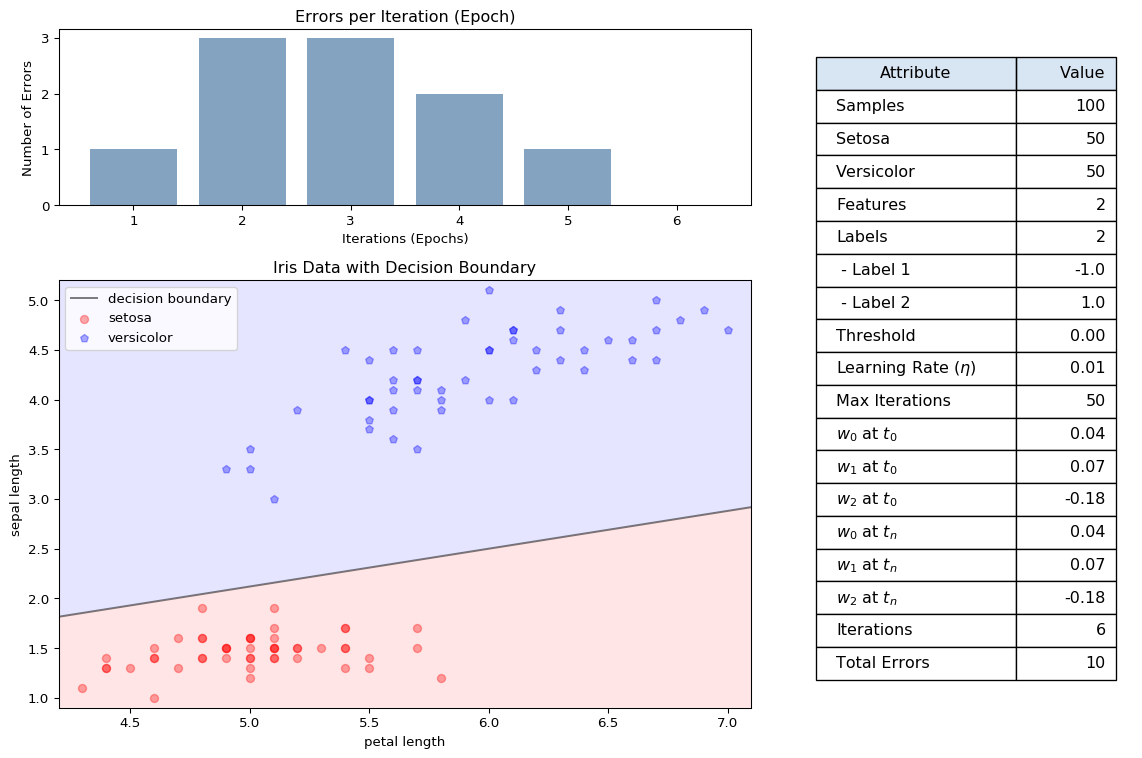

In [324]:
# Hopefully it looks good at this point. So let's run a trial and plot the
# misclassifications each iteration (epoch)
perc = Perceptron(samples,labels)
_ = perc.train(learning_rate=0.01, num_iterations=50, weight_values=0.0).info()

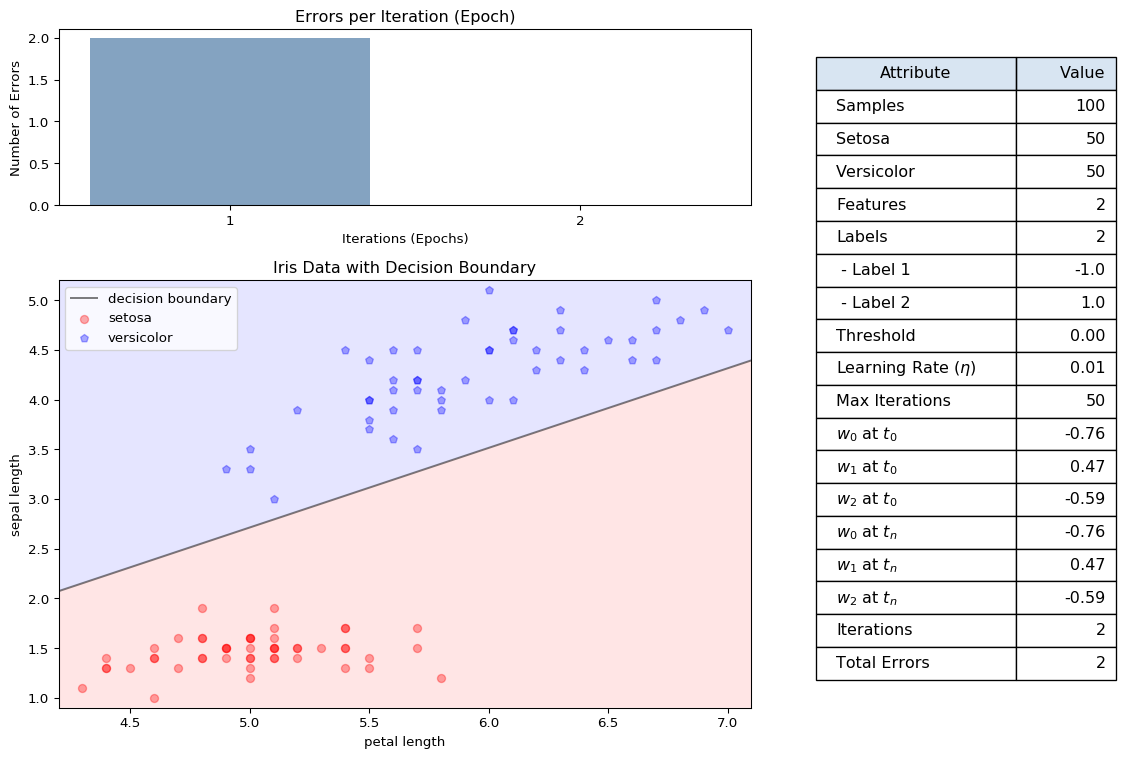

In [323]:
# Now try with random weights
_ perc.train(learning_rate=0.01, num_iterations=50, weight_values=None).info()

In [ ]:
# Now try changing other parameters like the learning rate
_ perc.train(learning_rate=0.01, num_iterations=50, weight_values=None).info()